In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cinci_1320 = pd.read_csv('./data/cinci1320.csv', index_col='Date_of_Payment', parse_dates=True).sort_index()

C:\Users\sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,18,19,47,48,49,50,51,52,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cinci_1320.head()

,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,...,xarelto,victoza,humira,levemir,invokana,farxiga,entresto,chantix,myrbetriq,toujeo
Date_of_Payment,,,,,,,,,,,,,,,,,,,,,
2013-08-01,UNCHANGED,Covered Recipient Physician,148974,RODNEY,NaN,VIVIAN,NaN,8000 5 MILE RD,240,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,58931,PAUL,JOSEPH,FAVORITO,NaN,7575 5 MILE RD,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,812462,ALFRED,JAMES,SUGAWARA,NaN,8477 FOXCROFT DR,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,108863,MARK,A,MANEGOLD,NaN,2450 KIPLING AVE,SUITE 104,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,195441,MANOJKUMAR,S,SINGH,NaN,10600 MONTGOMERY RD,SUITE 200,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cinci_1320['Change_Type'].value_counts()

UNCHANGED    364686
CHANGED         726
ADD               1
Name: Change_Type, dtype: int64

In [5]:
cinci_1320['toujeo'].value_counts()

0    362195
1      3218
Name: toujeo, dtype: int64

In [6]:
toujeo = cinci_1320[(cinci_1320['toujeo']==1) & (cinci_1320['Number_of_Payments_Included_in_Total_Amount']==1)].copy()

In [7]:
toujeo['toujeo'].value_counts()

1    3218
Name: toujeo, dtype: int64

In [8]:
toujeo['Change_Type'].value_counts()

UNCHANGED    3218
Name: Change_Type, dtype: int64

In [9]:
toujeo['touj_dollars'] = [k if ((i ==1) & (j ==1)) else 0 for i, j, k in zip(toujeo['toujeo'], toujeo['Number_of_Payments_Included_in_Total_Amount'], toujeo['Total_Amount_of_Payment_USDollars'])]

In [10]:
toujeo['touj_dollars'].sum()

71646.95

In [11]:
drop_cols = ['Change_Type','Covered_Recipient_Type',
'Physician_First_Name',
'Physician_Middle_Name',
'Physician_Last_Name',
'Physician_Name_Suffix',
'Recipient_Primary_Business_Street_Address_Line1',
'Recipient_Primary_Business_Street_Address_Line2',
'Recipient_City',
'Recipient_State',
'Recipient_Zip_Code',
'Recipient_Country',
'Physician_Primary_Type',
'Physician_Specialty',
'Physician_License_State_code1',
'Physician_License_State_code2',
'Physician_License_State_code3',
'Physician_License_State_code4',
'Physician_License_State_code5',
'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
'Form_of_Payment_or_Transfer_of_Value',
'City_of_Travel',
'State_of_Travel',
'Country_of_Travel',
'Physician_Ownership_Indicator',
'Third_Party_Payment_Recipient_Indicator',
'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
'Charity_Indicator',
'Third_Party_Equals_Covered_Recipient_Indicator',
'Contextual_Information',
'Delay_in_Publication_Indicator',
'Dispute_Status_for_Publication',
'Related_Product_Indicator',
'Covered_or_Noncovered_Indicator_1',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Product_Category_or_Therapeutic_Area_1',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Associated_Drug_or_Biological_NDC_1',
'Covered_or_Noncovered_Indicator_2',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Product_Category_or_Therapeutic_Area_2',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Associated_Drug_or_Biological_NDC_2',
'Covered_or_Noncovered_Indicator_3',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Product_Category_or_Therapeutic_Area_3',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Associated_Drug_or_Biological_NDC_3',
'Covered_or_Noncovered_Indicator_4',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Product_Category_or_Therapeutic_Area_4',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Associated_Drug_or_Biological_NDC_4',
'Covered_or_Noncovered_Indicator_5',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Product_Category_or_Therapeutic_Area_5',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Associated_Drug_or_Biological_NDC_5', 
'Physician_Profile_ID', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
'Total_Amount_of_Payment_USDollars','Number_of_Payments_Included_in_Total_Amount', 
'Nature_of_Payment_or_Transfer_of_Value', 'Record_ID', 
'Payment_Publication_Date', 'Program_Year',
'farxiga', 'victoza', 'humira', 'levemir', 'invokana',
'entresto', 'chantix', 'myrbetriq', 'xarelto']

In [12]:
toujeo.drop(columns = drop_cols, inplace = True)

In [13]:
toujeo_daily = toujeo.resample('d').sum()

In [14]:
toujeo_daily.head()

,toujeo,touj_dollars
Date_of_Payment,,
2015-04-03,1,10.00
2015-04-04,0,0.00
2015-04-05,0,0.00
2015-04-06,2,13.70
2015-04-07,6,59.42


In [15]:
toujeo_daily.sort_index()

,toujeo,touj_dollars
Date_of_Payment,,
2015-04-03,1,10.00
2015-04-04,0,0.00
2015-04-05,0,0.00
2015-04-06,2,13.70
2015-04-07,6,59.42
...,...,...
2020-10-10,0,0.00
2020-10-11,0,0.00
2020-10-12,0,0.00


Adding 1 to the daily sales for each observation so that Holt_winters will work.

In [16]:
toujeo_daily['touj_dollars'] = [i+1 for i in toujeo_daily['touj_dollars']]

Do EDA on data to check for stationarity
(found code to do this in this article: https://medium.com/analytics-vidhya/time-series-analysis-101-in-r-and-python-1e1a7f7c3e51)

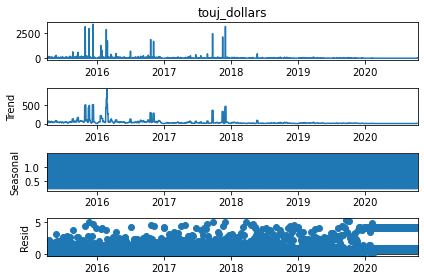

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(toujeo_daily['touj_dollars'], model="multiplicative")
result.plot();

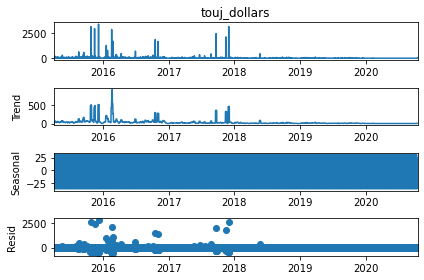

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(toujeo_daily['touj_dollars'], model="additive")
result.plot();

And from Jeff's lesson on forecasting

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

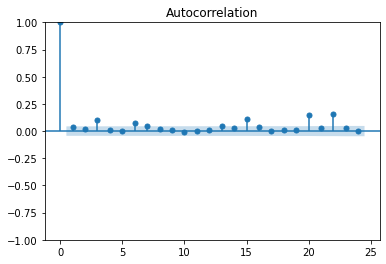

In [20]:
plot_acf(toujeo_daily['touj_dollars'], lags=24);

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


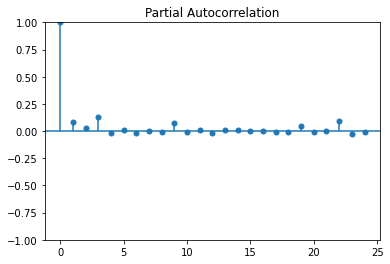

In [21]:
plot_pacf(toujeo['touj_dollars'], alpha=None, lags=24);

Set up Train and Test Sets using 2013 - 2020 Data

In [22]:
train = toujeo_daily.loc[:'2019-12-31']
train

,toujeo,touj_dollars
Date_of_Payment,,
2015-04-03,1,11.00
2015-04-04,0,1.00
2015-04-05,0,1.00
2015-04-06,2,14.70
2015-04-07,6,60.42
...,...,...
2019-12-27,0,1.00
2019-12-28,0,1.00
2019-12-29,0,1.00


In [23]:
train['touj_dollars'].max()

3377.18

In [24]:
train.describe()

,toujeo,touj_dollars
count,1734.000000,1734.000000
mean,1.851788,42.268431
std,2.815433,207.954070
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,3.000000,36.140000
max,18.000000,3377.180000


In [25]:
train.index.freq = 'D' 

In [26]:
train.shape

(1734, 2)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2015-04-03 to 2019-12-31
Freq: D
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   toujeo        1734 non-null   int64  
 1   touj_dollars  1734 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.6 KB


In [28]:
train.index

DatetimeIndex(['2015-04-03', '2015-04-04', '2015-04-05', '2015-04-06',
               '2015-04-07', '2015-04-08', '2015-04-09', '2015-04-10',
               '2015-04-11', '2015-04-12',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date_of_Payment', length=1734, freq='D')

In [29]:
test = toujeo_daily.loc['2020-01-01':]
test

,toujeo,touj_dollars
Date_of_Payment,,
2020-01-01,0,1.00
2020-01-02,0,1.00
2020-01-03,0,1.00
2020-01-04,0,1.00
2020-01-05,0,1.00
...,...,...
2020-10-10,0,1.00
2020-10-11,0,1.00
2020-10-12,0,1.00


In [30]:
test.describe()

,toujeo,touj_dollars
count,288.000000,288.000000
mean,0.024306,1.303785
std,0.256143,3.204511
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,3.000000,40.120000


In [31]:
test.shape

(288, 2)

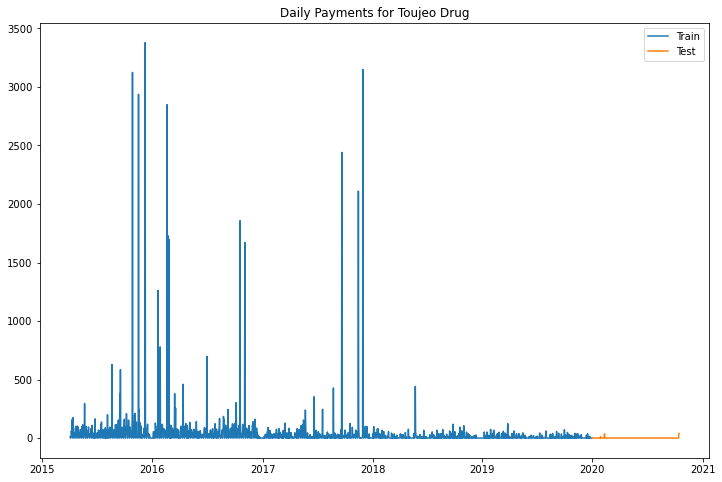

In [32]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['touj_dollars'], label='Train')
plt.plot(test.index, test['touj_dollars'], label='Test')

plt.legend(loc='best')
plt.title("Daily Payments for Toujeo Drug");

Baseline (Naive Model)

In [33]:
df_preds = test.copy(deep=True)
df_preds

,toujeo,touj_dollars
Date_of_Payment,,
2020-01-01,0,1.00
2020-01-02,0,1.00
2020-01-03,0,1.00
2020-01-04,0,1.00
2020-01-05,0,1.00
...,...,...
2020-10-10,0,1.00
2020-10-11,0,1.00
2020-10-12,0,1.00


In [34]:
df_preds['simple_mean'] = train['touj_dollars'].mean()
df_preds

,toujeo,touj_dollars,simple_mean
Date_of_Payment,,,
2020-01-01,0,1.00,42.268431
2020-01-02,0,1.00,42.268431
2020-01-03,0,1.00,42.268431
2020-01-04,0,1.00,42.268431
2020-01-05,0,1.00,42.268431
...,...,...,...
2020-10-10,0,1.00,42.268431
2020-10-11,0,1.00,42.268431
2020-10-12,0,1.00,42.268431


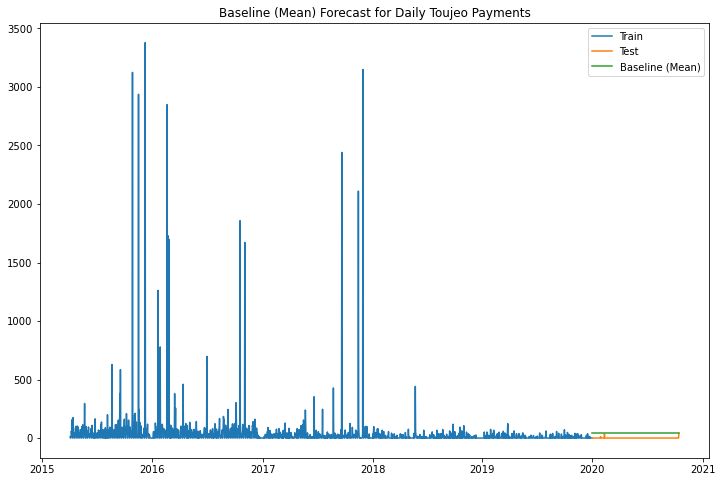

In [35]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['touj_dollars'], label='Train')
plt.plot(test.index, test['touj_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['simple_mean'], label="Baseline (Mean)")

plt.legend(loc='best')
plt.title("Baseline (Mean) Forecast for Daily Toujeo Payments");

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(df_preds['touj_dollars'], df_preds['simple_mean'])

40.96464665032689

Make a Seasonal Baseline Model with shift 52

In [37]:
df_preds['seasonal_52'] = train['touj_dollars'].shift(52, freq='D') 
df_preds.head(2)

,toujeo,touj_dollars,simple_mean,seasonal_52
Date_of_Payment,,,,
2020-01-01,0,1.0,42.268431,1.0
2020-01-02,0,1.0,42.268431,1.0


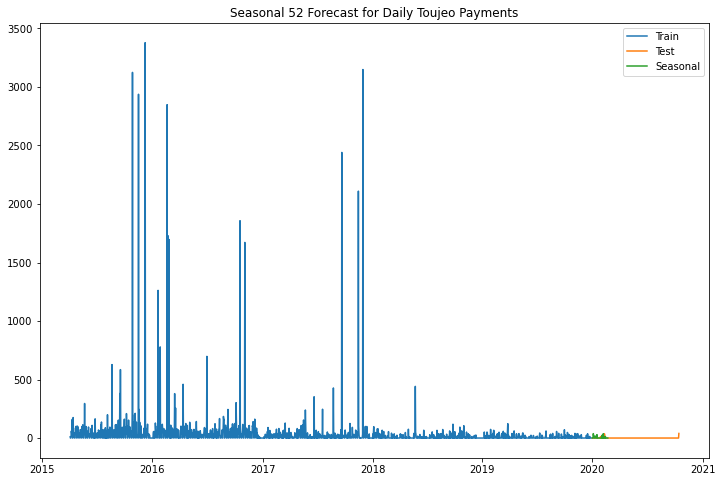

In [38]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['touj_dollars'], label='Train')
plt.plot(test.index, test['touj_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_52'], label='Seasonal')

plt.legend(loc='best')
plt.title("Seasonal 52 Forecast for Daily Toujeo Payments");

In [39]:
df_preds['seasonal_52'].fillna(0, inplace=True)

In [40]:
mean_absolute_error(df_preds['touj_dollars'], df_preds['seasonal_52'])

1.942361111111111

This is barely slightly better than the baseline model which had an MSE of 755.49.

Make a Seasonal Baseline Model with shift 364

In [41]:
df_preds['seasonal_364'] = train['touj_dollars'].shift(364, freq='D') 
df_preds.head(2)

,toujeo,touj_dollars,simple_mean,seasonal_52,seasonal_364
Date_of_Payment,,,,,
2020-01-01,0,1.0,42.268431,1.0,1.0
2020-01-02,0,1.0,42.268431,1.0,1.0


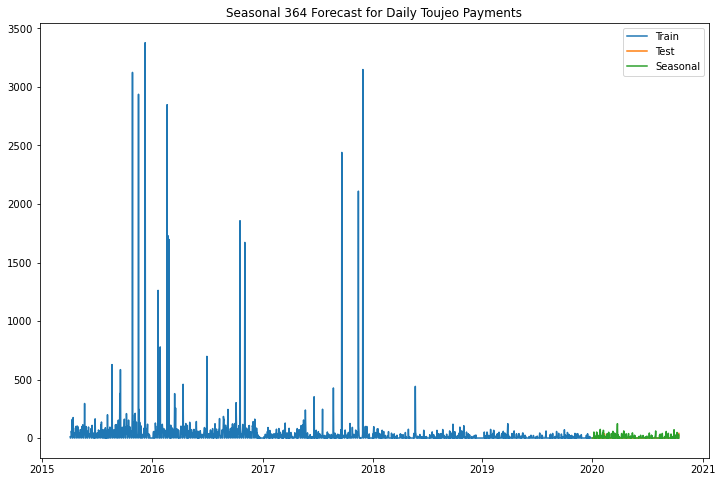

In [42]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['touj_dollars'], label='Train')
plt.plot(test.index, test['touj_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_364'], label='Seasonal')

plt.legend(loc='best')
plt.title("Seasonal 364 Forecast for Daily Toujeo Payments");

In [43]:
mean_absolute_error(df_preds['touj_dollars'], df_preds['seasonal_364'])

9.204722222222223

Simple Exponential Smoothing Model

In [44]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [45]:
ses = SimpleExpSmoothing(train['touj_dollars']).fit(smoothing_level=.5)

In [46]:
ses.summary()

Dep. Variable:,touj_dollars,No. Observations:,1734
Model:,SimpleExpSmoothing,SSE,96685427.606
Optimized:,True,AIC,18954.517
Trend:,None,BIC,18965.433
Seasonal:,None,AICC,18954.540
Seasonal Periods:,None,Date:,"Sat, 12 Mar 2022"
Box-Cox:,False,Time:,22:22:58
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,10.339922,l.0,True


In [47]:
ses_forecast = ses.forecast(len(test))

In [48]:
df_preds['ses'] = ses_forecast

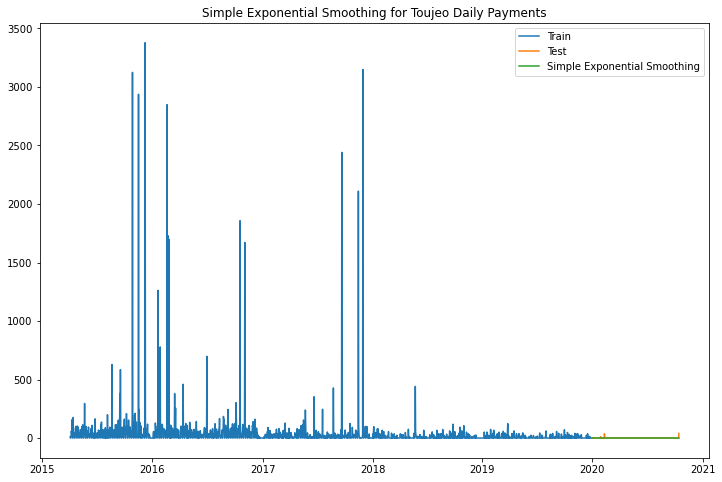

In [49]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['touj_dollars'], label='Train')
plt.plot(test.index, test['touj_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['ses'], label='Simple Exponential Smoothing')

plt.legend(loc='best')
plt.title("Simple Exponential Smoothing for Toujeo Daily Payments");

In [50]:
mean_absolute_error(df_preds['touj_dollars'], df_preds['ses'])

0.33136761793354313

This is horrible!  The MSE is nearly twice that of the baseline and seasonal models!  Will discard this model.

Holt-Winters Multiplicative Model with Seasonality of 52

In [51]:
hw_m52 = ExponentialSmoothing(
    train['touj_dollars'],
    seasonal_periods=52, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [52]:
hw_m52.summary()

Dep. Variable:,touj_dollars,No. Observations:,1734
Model:,ExponentialSmoothing,SSE,77104407.698
Optimized:,True,AIC,18670.109
Trend:,Multiplicative,BIC,18975.767
Seasonal:,Multiplicative,AICC,18674.195
Seasonal Periods:,52,Date:,"Sat, 12 Mar 2022"
Box-Cox:,False,Time:,22:23:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0001,beta,True


In [53]:
df_preds['hw_m52'] = hw_m52.forecast(len(test))
df_preds.head(2)

,toujeo,touj_dollars,simple_mean,seasonal_52,seasonal_364,ses,hw_m52
Date_of_Payment,,,,,,,
2020-01-01,0,1.0,42.268431,1.0,1.0,1.02817,7.157596
2020-01-02,0,1.0,42.268431,1.0,1.0,1.02817,29.046750


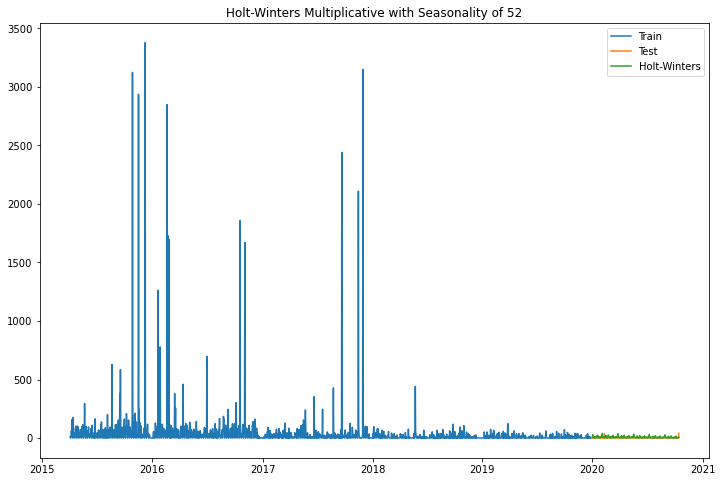

In [54]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['touj_dollars'], label='Train')
plt.plot(test.index, test['touj_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Multiplicative with Seasonality of 52");

In [55]:
mean_absolute_error(df_preds["touj_dollars"], df_preds["hw_m52"])

6.3102921947051875

Holt-Winters Multiplicative Model with Seasonality of 364

In [56]:
hw_m364 = ExponentialSmoothing(
    train['touj_dollars'],
    seasonal_periods=364, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [57]:
hw_m364.summary()

Dep. Variable:,touj_dollars,No. Observations:,1734
Model:,ExponentialSmoothing,SSE,75664638.096
Optimized:,True,AIC,19261.424
Trend:,Multiplicative,BIC,21270.036
Seasonal:,Multiplicative,AICC,19462.847
Seasonal Periods:,364,Date:,"Sat, 12 Mar 2022"
Box-Cox:,False,Time:,22:23:01
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0001,beta,True


In [58]:
df_preds['hw_m364'] = hw_m364.forecast(len(test))
df_preds.head(2)

,toujeo,touj_dollars,simple_mean,seasonal_52,seasonal_364,ses,hw_m52,hw_m364
Date_of_Payment,,,,,,,,
2020-01-01,0,1.0,42.268431,1.0,1.0,1.02817,7.157596,1.202537
2020-01-02,0,1.0,42.268431,1.0,1.0,1.02817,29.046750,31.512523


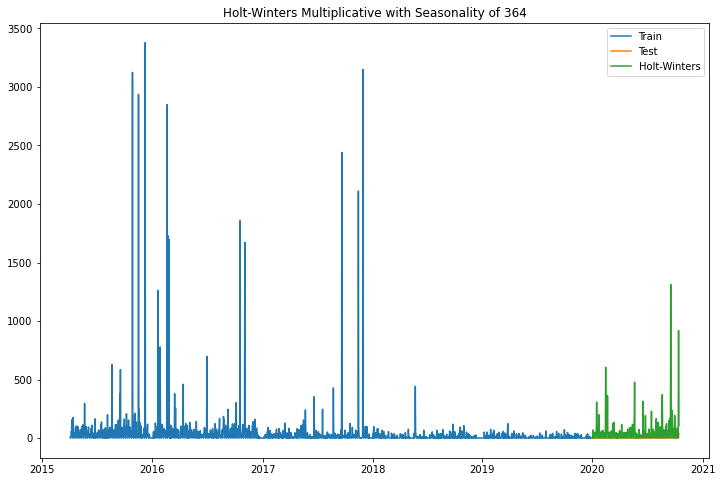

In [59]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['touj_dollars'], label='Train')
plt.plot(test.index, test['touj_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m364'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Multiplicative with Seasonality of 364");

In [60]:
mean_absolute_error(df_preds["touj_dollars"], df_preds["hw_m364"])

50.84057771532855

Now, try an additive Holt-Winters Model with a seasonal period of 52.

In [61]:
hw_a52 = ExponentialSmoothing(
    train['touj_dollars'],
    seasonal_periods=52, 
    trend='add',
    seasonal='add'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [62]:
hw_a52.summary()

Dep. Variable:,touj_dollars,No. Observations:,1734
Model:,ExponentialSmoothing,SSE,81275797.766
Optimized:,True,AIC,18761.469
Trend:,Additive,BIC,19067.128
Seasonal:,Additive,AICC,18765.555
Seasonal Periods:,52,Date:,"Sat, 12 Mar 2022"
Box-Cox:,False,Time:,22:23:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0001,beta,True


In [63]:
df_preds['hw_a52'] = hw_a52.forecast(len(test))
df_preds.head(2)

,toujeo,touj_dollars,simple_mean,seasonal_52,seasonal_364,ses,hw_m52,hw_m364,hw_a52
Date_of_Payment,,,,,,,,,
2020-01-01,0,1.0,42.268431,1.0,1.0,1.02817,7.157596,1.202537,34.578917
2020-01-02,0,1.0,42.268431,1.0,1.0,1.02817,29.046750,31.512523,19.274314


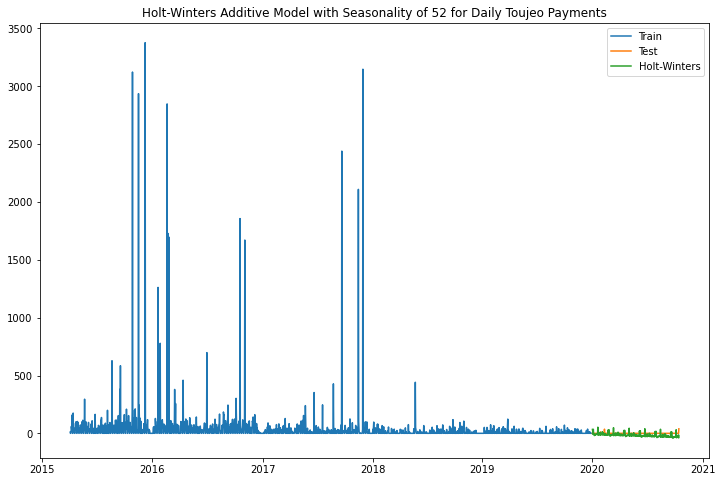

In [64]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['touj_dollars'], label='Train')
plt.plot(test.index, test['touj_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 52 for Daily Toujeo Payments");

In [65]:
mean_absolute_error(df_preds["touj_dollars"], df_preds["hw_a52"])

20.649676596593096

Now, try an additive Holt-Winters Model with a seasonal period of 364.

In [66]:
hw_a364 = ExponentialSmoothing(
    train['touj_dollars'],
    seasonal_periods=364, 
    trend='add',
    seasonal='add'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [67]:
df_preds['hw_a364'] = hw_a364.forecast(len(test))
df_preds.head(2)

,toujeo,touj_dollars,simple_mean,seasonal_52,seasonal_364,ses,hw_m52,hw_m364,hw_a52,hw_a364
Date_of_Payment,,,,,,,,,,
2020-01-01,0,1.0,42.268431,1.0,1.0,1.02817,7.157596,1.202537,34.578917,-70.357881
2020-01-02,0,1.0,42.268431,1.0,1.0,1.02817,29.046750,31.512523,19.274314,-46.135651


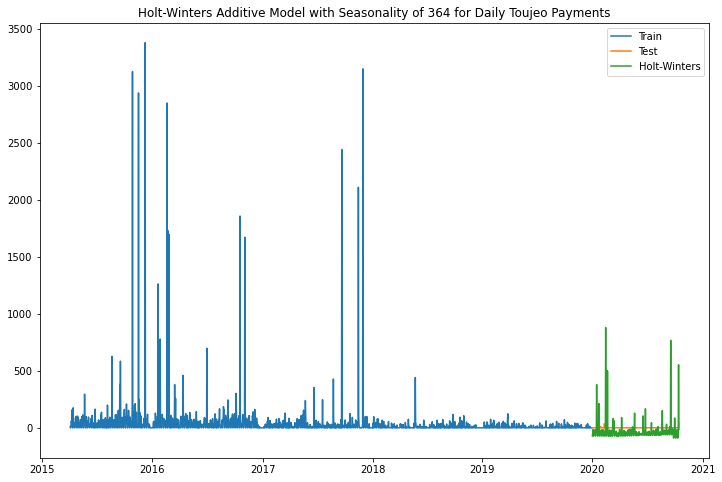

In [68]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['touj_dollars'], label='Train')
plt.plot(test.index, test['touj_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a364'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 364 for Daily Toujeo Payments");

In [69]:
mean_absolute_error(df_preds["touj_dollars"], df_preds["hw_a364"])

62.57907192636344

Now, try an additive Holt-Winters Model with a seasonal period of 7.

In [70]:
hw_a7 = ExponentialSmoothing(
    train['touj_dollars'],
    seasonal_periods=7, 
    trend='add',
    seasonal='add'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [71]:
hw_a7.summary()

Dep. Variable:,touj_dollars,No. Observations:,1734
Model:,ExponentialSmoothing,SSE,73733327.350
Optimized:,True,AIC,18502.589
Trend:,Additive,BIC,18562.629
Seasonal:,Additive,AICC,18502.801
Seasonal Periods:,7,Date:,"Sat, 12 Mar 2022"
Box-Cox:,False,Time:,22:23:05
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0080714,beta,True


In [72]:
df_preds['hw_a7'] = hw_a7.forecast(len(test))
df_preds.head(2)

,toujeo,touj_dollars,simple_mean,seasonal_52,seasonal_364,ses,hw_m52,hw_m364,hw_a52,hw_a364,hw_a7
Date_of_Payment,,,,,,,,,,,
2020-01-01,0,1.0,42.268431,1.0,1.0,1.02817,7.157596,1.202537,34.578917,-70.357881,17.494344
2020-01-02,0,1.0,42.268431,1.0,1.0,1.02817,29.046750,31.512523,19.274314,-46.135651,17.939773


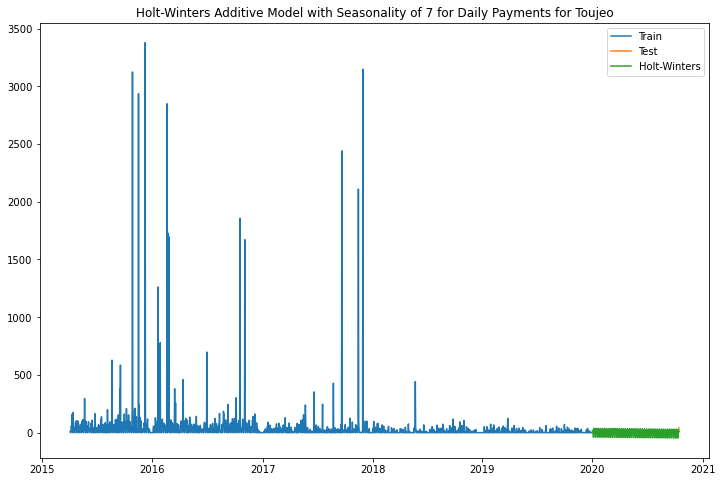

In [73]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['touj_dollars'], label='Train')
plt.plot(test.index, test['touj_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a7'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 7 for Daily Payments for Toujeo");

In [74]:
mean_absolute_error(df_preds["touj_dollars"], df_preds["hw_a7"])

24.33821600738468

Now, try a multiplicative Holt-Winters Model with a seasonal period of 7.

In [75]:
hw_m7 = ExponentialSmoothing(
    train['touj_dollars'],
    seasonal_periods=7, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [76]:
hw_m7.summary()

Dep. Variable:,touj_dollars,No. Observations:,1734
Model:,ExponentialSmoothing,SSE,74099016.168
Optimized:,True,AIC,18511.168
Trend:,Multiplicative,BIC,18571.208
Seasonal:,Multiplicative,AICC,18511.380
Seasonal Periods:,7,Date:,"Sat, 12 Mar 2022"
Box-Cox:,False,Time:,22:23:06
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0080714,beta,True


In [77]:
df_preds['hw_m7'] = hw_m7.forecast(len(test))
df_preds.head(2)

,toujeo,touj_dollars,simple_mean,seasonal_52,seasonal_364,ses,hw_m52,hw_m364,hw_a52,hw_a364,hw_a7,hw_m7
Date_of_Payment,,,,,,,,,,,,
2020-01-01,0,1.0,42.268431,1.0,1.0,1.02817,7.157596,1.202537,34.578917,-70.357881,17.494344,19.569285
2020-01-02,0,1.0,42.268431,1.0,1.0,1.02817,29.046750,31.512523,19.274314,-46.135651,17.939773,18.963352


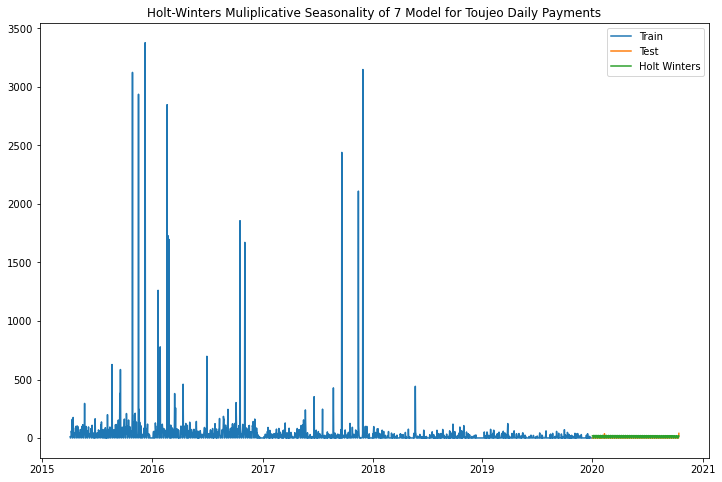

In [78]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['touj_dollars'], label='Train')
plt.plot(test.index, test['touj_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m7'], label='Holt Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Muliplicative Seasonality of 7 Model for Toujeo Daily Payments");

In [79]:
df_preds['hw_m7'].fillna(0, inplace=True)

In [80]:
mean_absolute_error(df_preds["touj_dollars"], df_preds["hw_m7"])

12.266765611614264

Try a SARIMA Model

In [81]:
from pmdarima.utils import tsdisplay

In [82]:
traina = train['touj_dollars']

C:\Users\sarah\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


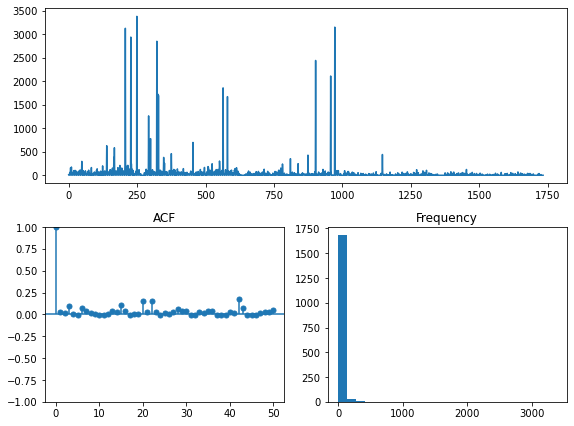

In [83]:
tsdisplay(traina)

In [84]:
import pmdarima as pmd
model_s7 = pmd.auto_arima(train['touj_dollars'], m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=3.67 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=24569.189, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=24091.881, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=24567.189, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=24091.318, Time=0.07 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=24091.855, Time=0.20 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=24093.832, Time=0.96 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=23814.292, Time=0.11 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=23813.398, Time=0.30 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=23815.087, Time=1.39 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=2.31 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : AIC=23813.480, Time=0.29 sec
 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=23817.105, Time=1.82 sec
 ARIMA(3,1,0)(1,0,0)[7] intercept   :

In [85]:
model_s7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1734
Model:               SARIMAX(5, 1, 1)   Log Likelihood              -11689.251
Date:                Sat, 12 Mar 2022   AIC                          23392.502
Time:                        22:24:03   BIC                          23430.705
Sample:                             0   HQIC                         23406.631
                               - 1734                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0008      0.049      0.016      0.988      -0.096       0.097
ar.L2         -0.0151      0.056     -0.271      0.787      -0.124       0.094
ar.L3          0.0669      0.010      6.850      0.000       0.048       0.086
ar.L4         -0.0282      0.062     -0.455      0.649      -0.150       0.093
ar.L5         -0.0381      0.089     -0.428      0.669      -0.212       0.136
ma.L1         -0.9847      0.005   -190.280      0.000      -0.995      -0.975
sigma2      4.221e+04    273.466    154.336      0.000    4.17e+04    4.27e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1839902.97
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            11.86
Prob(H) (two-sided):                  0.00   Kurtosis:                       160.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
preds_sar7 = model_s7.predict(test.shape[0])
preds_sar7

array([6.8163049 , 6.82079414, 6.73304681, 7.12212697, 6.95982191,
       6.72639337, 6.75700511, 6.74204391, 6.71571999, 6.73074415,
       6.73817431, 6.73544884, 6.73765291, 6.7387709 , 6.73777434,
       6.73769827, 6.73782959, 6.73764868, 6.73762704, 6.73767863,
       6.73766608, 6.73766395, 6.73767509, 6.73767366, 6.73767173,
       6.73767304, 6.73767274, 6.73767221, 6.73767241, 6.73767243,
       6.73767235, 6.73767239, 6.73767241, 6.73767239, 6.7376724 ,
       6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 ,
       6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 ,
       6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 ,
       6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 ,
       6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 ,
       6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 ,
       6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 ,
       6.7376724 , 6.7376724 , 6.7376724 , 6.7376724 , 6.73767

In [87]:
df_preds['sarima7_auto'] = preds_sar7
df_preds['sarima7_auto'].head(2)

Date_of_Payment
2020-01-01    6.816305
2020-01-02    6.820794
Freq: D, Name: sarima7_auto, dtype: float64

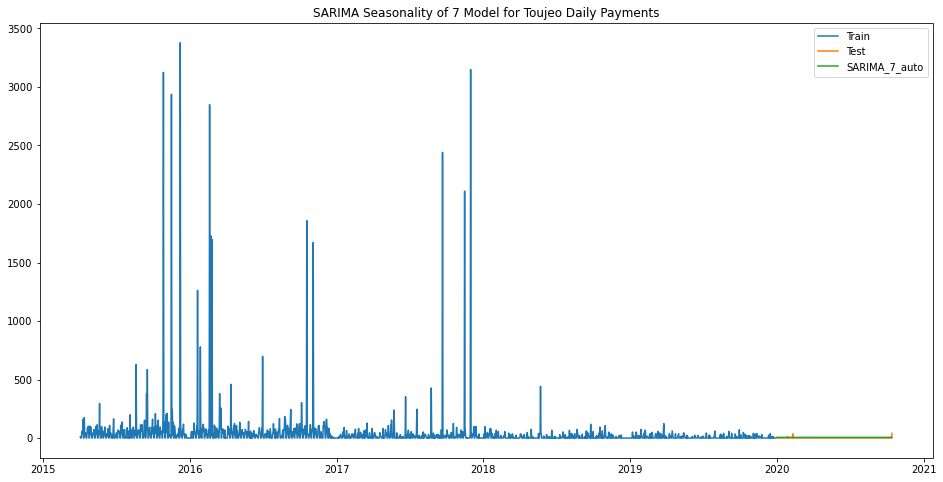

In [88]:
plt.figure(figsize=(16,8))
plt.plot(train['touj_dollars'], label='Train')
plt.plot(test['touj_dollars'], label='Test')
plt.plot(df_preds['sarima7_auto'], label='SARIMA_7_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Toujeo Daily Payments");

In [89]:
mean_absolute_error(df_preds['touj_dollars'], df_preds['sarima7_auto'])

5.924515495335247

Try a SARIMA Model with m = 52

In [ ]:
model_s52 = pmd.auto_arima(train['touj_dollars'], m=52, trace=True)

In [ ]:
model_s52.summary()

In [ ]:
preds_sar52 = model_s52.predict(test.shape[0])
preds_sar52

In [ ]:
df_preds['sarima52_auto'] = preds_sar52
df_preds['sarima52_auto'].head(2)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['touj_dollars'], label='Train')
plt.plot(test['touj_dollars'], label='Test')
plt.plot(df_preds['sarima52_auto'], label='SARIMA_52_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Toujeo Daily Payments");

In [ ]:
mean_absolute_error(df_preds['touj_dollars'], df_preds['sarima52_auto'])

Create a comprehensive overview of model metrics

In [ ]:
print("Summary of Metrics for Daily Toujeo CMS Payments")
print("_________________________________________________")
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['touj_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['touj_dollars'], df_preds['simple_mean'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['touj_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['touj_dollars'], df_preds['seasonal_52'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 364 Shift Model:", mean_absolute_error(df_preds['touj_dollars'], df_preds['seasonal_364']))
print("RMSE for Seasonal Baseline 364 Shift Model:", mean_squared_error(df_preds['touj_dollars'], df_preds['seasonal_364'], squared=False))
print("_________________________________________________")
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['touj_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['touj_dollars'], df_preds['ses'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['touj_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['touj_dollars'], df_preds['hw_m7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['touj_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['touj_dollars'], df_preds['hw_m52'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 364 Model:", mean_absolute_error(df_preds['touj_dollars'], df_preds['hw_m364']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 364 Model:", mean_squared_error(df_preds['touj_dollars'], df_preds['hw_m364'], squared=False))
print("_________________________________________________")

In [ ]:
print("Continued Summary of Metrics for Daily Toujeo CMS Payments")
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['touj_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['touj_dollars'], df_preds['hw_a7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['touj_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['touj_dollars'], df_preds['hw_a52'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 364 Model:", mean_absolute_error(df_preds['touj_dollars'], df_preds['hw_a364']))
print("RMSE for Holt-Winters Additive with Seasonality of 364 Model:", mean_squared_error(df_preds['touj_dollars'], df_preds['hw_a364'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['touj_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['touj_dollars'], df_preds['sarima7_auto'], squared=False))
#print("_________________________________________________")
#print("MAE for SARIMA with Seasonality of 52 Model:", mean_absolute_error(df_preds['touj_dollars'], df_preds['sarima52_auto']))
#print("RMSE for SARIMA with Seasonality of 52 Model:", mean_squared_error(df_preds['touj_dollars'], df_preds['sarima52_auto'], squared=False))